In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
#import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, recall_score,make_scorer
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score,classification_report
from sklearn.multiclass import BaseEstimator
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_validate
import os 
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
path="../../Data/"
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data_cleaning import processing_functions as pfs
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from src.data_cleaning import useful_viz

In [9]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
#import customized functions
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import exploration_functions as efs
from src.data_cleaning import processing_functions as pfs
from src.data_cleaning import useful_viz 

In [11]:
X_train, X_test, y_train, y_test, classes_dict = pfs.processed_dataset()

In [12]:
X_train['gps_height_binned'] = pd.cut(X_train['gps_height'], bins=[-150,-1,1,750,1250,1750,3000],
       labels=['below surface level', 'at surface level', 
               'above surface upto 750', 'above surface up to 1250',
               'above surface upto 1750', 'above 1750'])

In [13]:
X_test['gps_height_binned'] = pd.cut(X_test['gps_height'], bins=[-150,-1,1,750,1250,1750,3000],
       labels=['below surface level', 'at surface level', 
               'above surface upto 750', 'above surface upto 1250',
               'above surface upto 1750', 'above 1750'])

In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 9305 to 50184
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gps_height         14850 non-null  float64 
 1   longitude          14850 non-null  float64 
 2   latitude           14850 non-null  float64 
 3   basin              14850 non-null  object  
 4   region             14850 non-null  object  
 5   district_code      14850 non-null  int64   
 6   lga                14850 non-null  object  
 7   population         14850 non-null  float64 
 8   public_meeting     14850 non-null  object  
 9   scheme_management  14850 non-null  object  
 10  permit             14850 non-null  object  
 11  construction_year  14850 non-null  int64   
 12  extraction_type    14850 non-null  object  
 13  management         14850 non-null  object  
 14  payment            14850 non-null  object  
 15  water_quality      14850 non-null  object  
 16  q

In [15]:
X_train["gps_height_binned"] = X_train["gps_height_binned"].astype("category").astype(object)

In [16]:
X_test["gps_height_binned"] = X_test["gps_height_binned"].astype("category").astype(object)

In [17]:
X_train, X_test = pfs.ohe_train_and_test_features(X_train, X_test)

In [18]:
X_train.drop("gps_height",axis=1,inplace=True)

In [19]:
X_test.drop("gps_height",axis=1,inplace=True)

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 29193 to 41824
Columns: 283 entries, longitude to 80
dtypes: float64(282), int64(1)
memory usage: 96.5 MB


Starting off with a simple Decision Tree and then working my way towards Ensemble Methods

In [20]:
sm=SMOTE(sampling_strategy="minority",random_state=2020)
X_train_smote, y_train_smote =sm.fit_sample(X_train.values, y_train.target)

In [21]:
bg = BaggingClassifier(random_state=2020,)
model1 = bg.fit(X_train_smote, y_train_smote)


In [26]:
# scorer=make_scorer(recall_score(average="weighted"))

In [23]:
# cross_validate(model1,X_train_smote,y_train_smote.values,cv=2,scoring="recall_macro")

In [27]:
cross_val_score(model1,X_train_smote,y_train_smote, cv=3,scoring="recall_macro",).mean()

0.8277467182317414

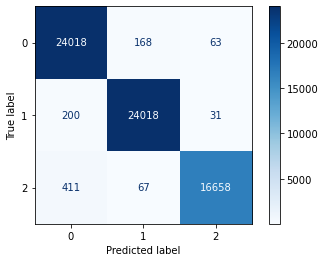

In [179]:
plot_confusion_matrix(model1, X_train_smote, y_train_smote, cmap='Blues', values_format='d');

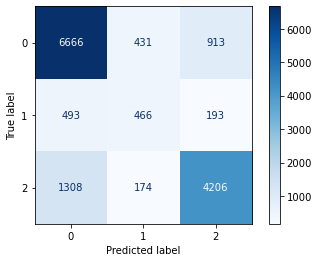

In [168]:
plot_confusion_matrix(model1, X_test, y_test, cmap='Blues', values_format='d');

In [169]:
yhat_train=model1.predict(X_train_smote)

In [28]:
yhat_test=model1.predict(X_test)

In [171]:
model1.score(X_train_smote,y_train_smote)

0.9856781546149861

In [42]:
recall_score(y_test,yhat_test,average=None,)[2]

0.7396272855133614

In [172]:
model1.score(X_test,y_test)

0.7635016835016835

In [173]:
recall_scorefication_report(y_train_smote,yhat_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     24249
           1       0.99      0.99      0.99     24249
           2       0.99      0.97      0.98     17136

    accuracy                           0.99     65634
   macro avg       0.99      0.98      0.99     65634
weighted avg       0.99      0.99      0.99     65634



In [174]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      8010
           1       0.44      0.40      0.42      1152
           2       0.79      0.74      0.76      5688

    accuracy                           0.76     14850
   macro avg       0.67      0.66      0.66     14850
weighted avg       0.76      0.76      0.76     14850




fyi: rest of instructional team thinks "cross-val on training data, test on testing data, no validation set" is a good way to go

In [46]:
bg2 = BaggingClassifier(random_state=2020,n_estimators=200,bootstrap_features=True)
model2 = bg.fit(X_train_smote, y_train_smote)

In [50]:
cross_val_score(model2,X_train_smote,y_train_smote, cv=3,scoring="recall_macro").mean()

TypeError: cross_val_score() got an unexpected keyword argument 'seed'

In [52]:
rf = RandomForestClassifier(random_state=2020)
model2 = rf.fit(X_train_smote, y_train_smote)

In [53]:
cross_val_score(rf,X_train_smote,y_train_smote, cv=3,scoring="recall_macro").mean()

0.8398364122478276

In [55]:
rf2 = RandomForestClassifier(random_state=2020,max_leaf_nodes=3)
model2 = rf2.fit(X_train_smote, y_train_smote)

In [56]:
cross_val_score(rf,X_train_smote,y_train_smote, cv=3,scoring="recall_macro").mean()

0.8398364122478276

In [62]:
print(classification_report(y_test,rf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70      8010
           1       0.18      0.48      0.26      1152
           2       0.91      0.26      0.41      5688

    accuracy                           0.57     14850
   macro avg       0.57      0.51      0.46     14850
weighted avg       0.70      0.57      0.56     14850



In [57]:
recall_score(y_test,yhat_test,average=None,)[2]

0.7396272855133614

In [61]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      8010
           1       0.51      0.39      0.44      1152
           2       0.84      0.75      0.79      5688

    accuracy                           0.79     14850
   macro avg       0.71      0.67      0.69     14850
weighted avg       0.79      0.79      0.79     14850

